In [1]:
import pandas as pd
import numpy as np
import datetime as dt

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [3]:
data_USED_CAR = pd.read_excel("data.xlsx", sheet_name="USED_CAR")
# data_NEW_CAR = pd.read_excel("data.xlsx", sheet_name="NEW_CAR")
print (data_USED_CAR.shape)
# print (data_NEW_CAR.shape)

(2956, 13)


In [4]:
data_USED_CAR.head()

CUSTOMERID  VEHICLEID TRANSACTION_DATE BRAND     MODEL  \
0     2741953     243834       2018-01-28     C    IMPALA   
1     2357269     243635       2017-12-27     D    MALIBU   
2     1366119     262206       2019-08-28     G  TRAVERSE   
3           0     267485       2019-08-29     G  CREW-CAB   
4      482589     231904       2017-01-31     G     TAHOE   

                COLOUR     ACTUAL_PRICE  DISCOUNTED RATIO    MODELYR  \
0  Silver Ice Metallic  221599.28582525           0.06445 2018.00000   
1  Coppertino Metallic      14654.95175           0.06437 2018.00000   
2         Summit White      22436.11079           0.06758 2019.00000   
3         Summit White      30461.50225           0.00000 2020.00000   
4                Black      30488.93468           0.06047 2017.00000   

   STORECODE GENCO GENDER     CUS_BIRTH_DATE  
0         73   SIL      F  75/01/28 00:00:00  
1         88   BRO      F  95/02/12 00:00:00  
2         71   WHI      F  89/09/01 00:00:00  
3         39   WHI      F  84/03/20 00:00:00  
4         84   BLA      M  98/10/02 00:00:00

In [5]:
# data_USED_CAR.columns.difference(data_NEW_CAR.columns)

In [6]:
data_USED_CAR.dtypes

CUSTOMERID            int64
VEHICLEID             int64
TRANSACTION_DATE     object
BRAND                object
MODEL                object
COLOUR               object
ACTUAL_PRICE         object
DISCOUNTED RATIO    float64
MODELYR             float64
STORECODE             int64
GENCO                object
GENDER               object
CUS_BIRTH_DATE       object
dtype: object

In [7]:
data_USED_CAR['TRANSACTION_DATE_1'] = pd.to_datetime(data_USED_CAR['TRANSACTION_DATE'], format='%Y-%m-%d')

In [8]:
data_USED_CAR.head()

CUSTOMERID  VEHICLEID TRANSACTION_DATE BRAND     MODEL  \
0     2741953     243834       2018-01-28     C    IMPALA   
1     2357269     243635       2017-12-27     D    MALIBU   
2     1366119     262206       2019-08-28     G  TRAVERSE   
3           0     267485       2019-08-29     G  CREW-CAB   
4      482589     231904       2017-01-31     G     TAHOE   

                COLOUR     ACTUAL_PRICE  DISCOUNTED RATIO    MODELYR  \
0  Silver Ice Metallic  221599.28582525           0.06445 2018.00000   
1  Coppertino Metallic      14654.95175           0.06437 2018.00000   
2         Summit White      22436.11079           0.06758 2019.00000   
3         Summit White      30461.50225           0.00000 2020.00000   
4                Black      30488.93468           0.06047 2017.00000   

   STORECODE GENCO GENDER     CUS_BIRTH_DATE TRANSACTION_DATE_1  
0         73   SIL      F  75/01/28 00:00:00         2018-01-28  
1         88   BRO      F  95/02/12 00:00:00         2017-12-27  
2         71   WHI      F  89/09/01 00:00:00         2019-08-28  
3         39   WHI      F  84/03/20 00:00:00         2019-08-29  
4         84   BLA      M  98/10/02 00:00:00         2017-01-31

In [9]:
data_USED_CAR.dtypes

CUSTOMERID                     int64
VEHICLEID                      int64
TRANSACTION_DATE              object
BRAND                         object
MODEL                         object
COLOUR                        object
ACTUAL_PRICE                  object
DISCOUNTED RATIO             float64
MODELYR                      float64
STORECODE                      int64
GENCO                         object
GENDER                        object
CUS_BIRTH_DATE                object
TRANSACTION_DATE_1    datetime64[ns]
dtype: object

In [10]:
data_old_1 = data_USED_CAR[data_USED_CAR['CUS_BIRTH_DATE'].str.contains("/", na=False)]
data_old_1['CUS_BIRTH_DATE_1'] = pd.to_datetime(data_old_1['CUS_BIRTH_DATE'], format='%y/%m/%d %H:%M:%S')

# print (data_old_1.head())
# data_old_1.shape

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
data_old_1.dtypes

CUSTOMERID                     int64
VEHICLEID                      int64
TRANSACTION_DATE              object
BRAND                         object
MODEL                         object
COLOUR                        object
ACTUAL_PRICE                  object
DISCOUNTED RATIO             float64
MODELYR                      float64
STORECODE                      int64
GENCO                         object
GENDER                        object
CUS_BIRTH_DATE                object
TRANSACTION_DATE_1    datetime64[ns]
CUS_BIRTH_DATE_1      datetime64[ns]
dtype: object

In [12]:
data_old_2 = data_USED_CAR[~data_USED_CAR['CUS_BIRTH_DATE'].str.contains("/", na=False)]
data_old_2.shape

(514, 14)

In [13]:
# data_old_2.head(10)

In [14]:
data_old_2['CUS_BIRTH_DATE'] = np.where(data_old_2['CUS_BIRTH_DATE']=='en', np.NAN, data_old_2['CUS_BIRTH_DATE'])
print (data_old_2[data_old_2['CUS_BIRTH_DATE'] == 'en'].shape)

data_old_2['CUS_BIRTH_DATE_1'] = pd.to_datetime(data_old_2['CUS_BIRTH_DATE'], format='%Y-%m-%d %H:%M:%S')
data_old_2.shape

(0, 14)


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


(514, 15)

In [21]:
data_old_2.head()

CUSTOMERID  VEHICLEID TRANSACTION_DATE BRAND     MODEL  \
8            0     268265       2019-05-19     G   EQUINOX   
11           0     265606       2019-05-19     D    MALIBU   
14     2590218     237065       2017-11-29     G     TAHOE   
15           0     252187       2019-05-19   NaN       NaN   
17     2869355     231691       2017-09-16     G  CREW-CAB   

                        COLOUR ACTUAL_PRICE  DISCOUNTED RATIO    MODELYR  \
8                 Summit White  15242.29402           0.05755 2020.00000   
11  Black Meet Kettle Metallic  15006.47463           0.06828 2020.00000   
14   Champagne Silver Metallic  31284.39223           0.06334 2017.00000   
15                         NaN            0               nan        nan   
17         Silver Ice Metallic  35392.76260           0.05909 2017.00000   

    STORECODE GENCO GENDER CUS_BIRTH_DATE TRANSACTION_DATE_1 CUS_BIRTH_DATE_1  
8          32   WHI      M            NaT         2019-05-19              NaT  
11         50   BLA      M     2027-01-08         2019-05-19       2027-01-08  
14         82   GOL    n?a            NaT         2017-11-29              NaT  
15         37   NaN      F            NaT         2019-05-19              NaT  
17         97   SIL      F            NaT         2017-09-16              NaT

In [16]:
data_USED_CAR_new = pd.concat([data_old_1,data_old_2], axis=0)

In [17]:
data_USED_CAR_new['MODELYR'] = data_USED_CAR_new['MODELYR'].fillna(-1)
data_USED_CAR_new['MODELYR'] = data_USED_CAR_new['MODELYR'].astype(int)
data_USED_CAR_new['MODELYR'] = data_USED_CAR_new['MODELYR'].astype(str)
data_USED_CAR_new['MODELYR'] = data_USED_CAR_new['MODELYR'].replace('-1', np.nan)

In [22]:
data_USED_CAR_new.head()

CUSTOMERID  VEHICLEID TRANSACTION_DATE BRAND     MODEL  \
0     2741953     243834       2018-01-28     C    IMPALA   
1     2357269     243635       2017-12-27     D    MALIBU   
2     1366119     262206       2019-08-28     G  TRAVERSE   
3           0     267485       2019-08-29     G  CREW-CAB   
4      482589     231904       2017-01-31     G     TAHOE   

                COLOUR     ACTUAL_PRICE  DISCOUNTED RATIO MODELYR  STORECODE  \
0  Silver Ice Metallic  221599.28582525           0.06445    2018         73   
1  Coppertino Metallic      14654.95175           0.06437    2018         88   
2         Summit White      22436.11079           0.06758    2019         71   
3         Summit White      30461.50225           0.00000    2020         39   
4                Black      30488.93468           0.06047    2017         84   

  GENCO GENDER     CUS_BIRTH_DATE TRANSACTION_DATE_1 CUS_BIRTH_DATE_1  
0   SIL      F  75/01/28 00:00:00         2018-01-28       1975-01-28  
1   BRO      F  95/02/12 00:00:00         2017-12-27       1995-02-12  
2   WHI      F  89/09/01 00:00:00         2019-08-28       1989-09-01  
3   WHI      F  84/03/20 00:00:00         2019-08-29       1984-03-20  
4   BLA      M  98/10/02 00:00:00         2017-01-31       1998-10-02

In [19]:
data_USED_CAR_new.shape

(2956, 15)

In [20]:
data_USED_CAR.shape

(2956, 14)

In [ ]:
###########################################################################################################

In [23]:
data_USED_CAR_new.reset_index(inplace=True)

In [24]:
dot_count = []
for i in range(data_USED_CAR_new.shape[0]):
    count = 0
#     print ("i", i)
    for j in data_USED_CAR_new.loc[data_USED_CAR_new.index[i],["ACTUAL_PRICE"]]:
        j = str(j)
#         print (j)
        if "#" in j:
            print (j)
            data_USED_CAR_new.loc[data_USED_CAR_new.index[i],["ACTUAL_PRICE"]] = data_USED_CAR_new.loc[data_USED_CAR_new.index[i],["ACTUAL_PRICE"]].str.replace('#',' ')
    
        

#22465.56497967
#29433.02487837


In [25]:
# data_USED_CAR_new["ACTUAL_PRICE_1"] = data_USED_CAR_new["ACTUAL_PRICE"].str.replace('#',' ')

In [26]:
# data_USED_CAR_new["ACTUAL_PRICE"]

In [27]:
dot_count = []
for i in range(data_USED_CAR_new.shape[0]):
    count = 0
#     print ("i", i)    
    for j in data_USED_CAR_new.loc[data_USED_CAR_new.index[i],["ACTUAL_PRICE"]]:
        j = str(j)
#         print (j)
        for k in j:
#             print (k)
            if k == '.': 
                count = count + 1
                if count > 1:
                    dot_count.append(i)

In [28]:
dot_count

[2219, 2227, 2880]

In [29]:
data_USED_CAR_new_1 = data_USED_CAR_new.drop(data_USED_CAR_new.index[dot_count])

In [30]:
print (data_USED_CAR_new_1.shape)
print (data_USED_CAR_new.shape)

(2953, 16)
(2956, 16)


In [31]:
data_USED_CAR_new_1["ACTUAL_PRICE"].fillna(0, inplace = True)


In [32]:
data_USED_CAR_new_1["ACTUAL_PRICE"] = data_USED_CAR_new_1["ACTUAL_PRICE"].astype(float)

In [33]:
# data_USED_CAR_new["ACTUAL_PRICE"]
data_USED_CAR_new_1["ACTUAL_PRICE"]

0       221599.28583
1        14654.95175
2        22436.11079
3        30461.50225
4        30488.93468
5        15797.80574
6        32202.15903
7        12052.24235
8        17787.27321
9        22709.47712
10       34224.05470
11       15006.47463
12       31055.40164
13       16841.79089
14       17171.54626
15       31899.14977
16       20231.65920
17       19167.03325
18       19434.57451
19       26127.03523
20       32052.84917
21       16722.92179
22       33896.66424
23       21355.68252
24       27113.40169
25       18095.04947
26       31722.96225
27       14753.68620
28       49725.02513
29        6198.57974
30       14977.84402
31       43162.75193
32       32096.36416
33       21642.53773
34           0.00000
35       17310.64724
36       31414.65982
37       30820.71181
38       38858.94014
39       27332.54943
40       30072.03494
41       15026.22896
42           0.00000
43       32202.15903
44       32464.80746
45       32506.43224
46       19423.06736
47       3410

In [34]:
###########################################################

In [35]:
data_USED_CAR_new_1["CUSTOMERID"].value_counts()

0          610
2590218     94
531506      58
482589      39
3070458     34
1090004     31
1634658     30
522473      29
293675      25
2741953     24
3030884     22
2129205     21
1033999     19
1802286     17
3072928     16
2755969     16
2539031     13
480427      13
3053432     11
2942648     11
2444190     11
1300624     10
2815418      9
1202300      9
1214787      9
414700       9
1067099      9
1636360      8
1068839      8
1980661      7
413780       6
3057709      6
2343366      5
873942       5
3129126      5
206957       5
2722093      5
3099960      4
1425131      4
2173957      4
1993346      4
1133569      4
1576130      3
2682119      3
2357269      3
2708733      3
1690296      3
2953480      3
2057647      3
2789946      3
2926195      3
3177033      3
1841605      2
1798403      2
3150399      2
2717141      2
2595046      2
3132878      2
2651663      2
2985734      2
2270466      2
1244860      2
1209665      2
2057919      2
3161064      2
1031121      2
2986341   

In [36]:
data_USED_CAR_new_1["BRAND"].value_counts()

G    1601
D     438
C     270
K     231
T     204
H      49
M       7
E       1
Name: BRAND, dtype: int64

In [37]:
data_USED_CAR_new_1["COLOUR"].value_counts()

Black                          367
Summit White                   296
Silver Ice Metallic            256
Pepperdust Metallic            228
Satin Steel Metallic           183
Switchblade Silver              77
Nightfall Gray Metallic         67
Shadow Gray Metallic            64
Tungsten Metallic               55
Graphite Metallic               52
Son of a Gun Grey Metallic      52
Coppertino Metallic             50
Champagne Silver Metallic       49
Crystal White                   41
Black Meet Kettle Metallic      40
Black Meet Kettle               37
Auburn Brown                    34
Mosaic Black Metallic           34
Blue Velvet Metallic            33
Havana Metallic                 32
Dark Shadow Metallic            32
Black Raven                     32
Satin Steel Gray Metallic       31
Iridescent Pearl                25
Stellar Black                   23
Deep Ocean Blue Metallic        22
Olympic White                   21
Switchblade Silver Metallic     19
Mocha Steel Metallic

In [38]:
data_USED_CAR_new_1["ACTUAL_PRICE"].plot.hist(bins=100, alpha=0.5)
# import matplotlib.pyplot as plt
# plt.hist(data_USED_CAR_new_1["ACTUAL_PRICE"].astype('float'))
# plt.show()

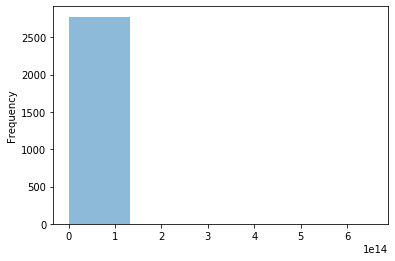

In [39]:
data_USED_CAR_new_1["DISCOUNTED RATIO"].plot.hist(bins=5, alpha=0.5)


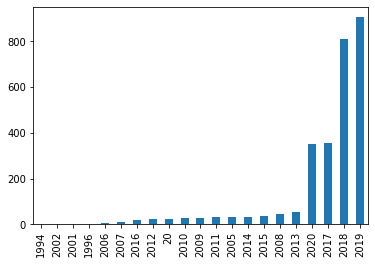

In [40]:
data_USED_CAR_new_1["MODELYR"].value_counts().sort_values().plot(kind = 'bar')



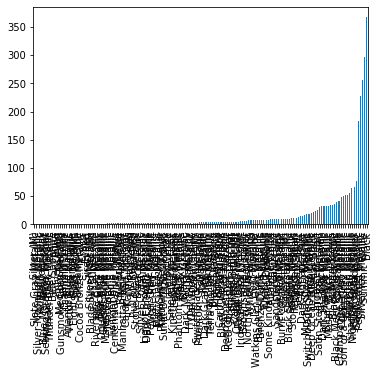

In [41]:
data_USED_CAR_new_1["COLOUR"].value_counts().sort_values().plot(kind = 'bar')


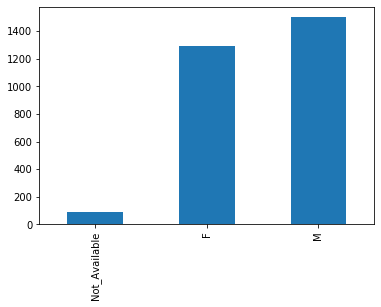

In [42]:
data_USED_CAR_new_1["GENDER"] = np.where(data_USED_CAR_new_1["GENDER"] =="n?a", "Not_Available", data_USED_CAR_new_1["GENDER"])

data_USED_CAR_new_1["GENDER"].value_counts().sort_values().plot(kind = 'bar')


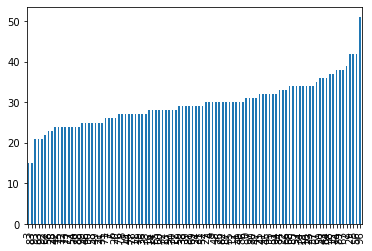

In [43]:
data_USED_CAR_new_1["STORECODE"].value_counts().sort_values().plot(kind = 'bar')


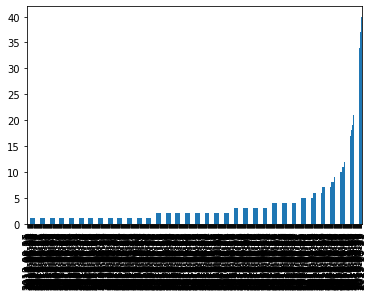

In [44]:

data_USED_CAR_new_1["TRANSACTION_DATE"].value_counts().sort_values().plot(kind = 'bar')


In [45]:
data_USED_CAR_new_1["CUS_BIRTH_DATE"].value_counts()


2022-01-09 00:00:00    7
2027-01-09 00:00:00    6
1930-01-09 00:00:00    5
2026-01-09 00:00:00    5
2020-01-09 00:00:00    5
2025-01-09 00:00:00    5
2023-01-09 00:00:00    4
2001-01-09 00:00:00    4
92/05/03 00:00:00      4
2001-01-10 00:00:00    3
88/03/08 00:00:00      3
85/01/30 00:00:00      3
90/01/01 00:00:00      3
94/08/04 00:00:00      3
90/10/10 00:00:00      3
90/09/26 00:00:00      3
83/01/01 00:00:00      3
85/03/23 00:00:00      3
90/04/12 00:00:00      3
2028-01-09 00:00:00    3
93/09/01 00:00:00      3
93/04/07 00:00:00      3
89/03/06 00:00:00      3
87/11/23 00:00:00      3
90/11/28 00:00:00      3
88/09/25 00:00:00      3
20/05/25 00:00:00      3
91/01/01 00:00:00      3
91/07/22 00:00:00      3
78/12/10 00:00:00      3
95/02/09 00:00:00      3
87/06/06 00:00:00      3
88/02/22 00:00:00      3
90/11/07 00:00:00      2
79/10/14 00:00:00      2
72/08/24 00:00:00      2
00/03/01 00:00:00      2
86/04/13 00:00:00      2
86/05/30 00:00:00      2
83/08/23 00:00:00      2


In [46]:
print ("min TRANSACTION_DATE", data_USED_CAR_new_1["TRANSACTION_DATE_1"].min() , "    max TRANSACTION_DATE" , data_USED_CAR_new_1["TRANSACTION_DATE_1"].max())
print ("min CUS_BIRTH_DATE", data_USED_CAR_new_1["CUS_BIRTH_DATE_1"].min() , "    max CUS_BIRTH_DATE" , data_USED_CAR_new_1["CUS_BIRTH_DATE_1"].max())

min TRANSACTION_DATE 2005-03-28 00:00:00     max TRANSACTION_DATE 2020-01-02 00:00:00
min CUS_BIRTH_DATE 1930-01-08 00:00:00     max CUS_BIRTH_DATE 2068-11-19 00:00:00


In [47]:
import datetime

now = datetime.datetime.now()
print ("Current date and time : ")
print (now.strftime("%Y-%m-%d %H:%M:%S"))

Current date and time : 
2020-02-23 23:51:03


In [ ]:
###################################### Anomalies  Detection#######################################

In [48]:
data_USED_CAR_new_1[data_USED_CAR_new_1["CUSTOMERID"] == 0].shape

(610, 16)

In [49]:
data_Anomalies_filters = data_USED_CAR_new_1[data_USED_CAR_new_1["CUSTOMERID"] != 0]
data_Anomalies_filters.shape

(2343, 16)

In [50]:
data_Anomalies_filters = data_Anomalies_filters[~data_Anomalies_filters["TRANSACTION_DATE"].isnull()]
data_Anomalies_filters.shape

(2249, 16)

In [51]:
data_Anomalies_filters.head()

index  CUSTOMERID  VEHICLEID TRANSACTION_DATE BRAND     MODEL  \
0      0     2741953     243834       2018-01-28     C    IMPALA   
1      1     2357269     243635       2017-12-27     D    MALIBU   
2      2     1366119     262206       2019-08-28     G  TRAVERSE   
4      4      482589     231904       2017-01-31     G     TAHOE   
5      5     1893602     236944       2017-05-27     D      TRAX   

                       COLOUR  ACTUAL_PRICE  DISCOUNTED RATIO MODELYR  \
0         Silver Ice Metallic  221599.28583           0.06445    2018   
1         Coppertino Metallic   14654.95175           0.06437    2018   
2                Summit White   22436.11079           0.06758    2019   
4                       Black   30488.93468           0.06047    2017   
5  Son of a Gun Grey Metallic   15797.80574           0.05965    2017   

   STORECODE GENCO GENDER     CUS_BIRTH_DATE TRANSACTION_DATE_1  \
0         73   SIL      F  75/01/28 00:00:00         2018-01-28   
1         88   BRO      F  95/02/12 00:00:00         2017-12-27   
2         71   WHI      F  89/09/01 00:00:00         2019-08-28   
4         84   BLA      M  98/10/02 00:00:00         2017-01-31   
5         71   GRY      M  83/11/28 00:00:00         2017-05-27   

  CUS_BIRTH_DATE_1  
0       1975-01-28  
1       1995-02-12  
2       1989-09-01  
4       1998-10-02  
5       1983-11-28

In [52]:
data_Anomalies_filters.dtypes

index                          int64
CUSTOMERID                     int64
VEHICLEID                      int64
TRANSACTION_DATE              object
BRAND                         object
MODEL                         object
COLOUR                        object
ACTUAL_PRICE                 float64
DISCOUNTED RATIO             float64
MODELYR                       object
STORECODE                      int64
GENCO                         object
GENDER                        object
CUS_BIRTH_DATE                object
TRANSACTION_DATE_1    datetime64[ns]
CUS_BIRTH_DATE_1      datetime64[ns]
dtype: object

In [53]:
transaction_id = data_Anomalies_filters[['CUSTOMERID', 'TRANSACTION_DATE_1']]

In [56]:
transaction_id = transaction_id.sort_values(['CUSTOMERID', 'TRANSACTION_DATE_1'])
transaction_id.head()

CUSTOMERID TRANSACTION_DATE_1
219         1845         2008-02-28
2740        2667         2019-11-14
1043        7838         2018-02-28
1228        8190         2019-03-28
1597       10181         2017-10-11

In [57]:
transaction_id.shape

(2249, 2)

In [58]:
transaction_id_final = transaction_id.drop_duplicates(keep ="first")

In [59]:
transaction_id_final["transaction_id"] = np.arange(transaction_id_final.shape[0])+1

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [60]:
transaction_id_final.head()

CUSTOMERID TRANSACTION_DATE_1  transaction_id
219         1845         2008-02-28               1
2740        2667         2019-11-14               2
1043        7838         2018-02-28               3
1228        8190         2019-03-28               4
1597       10181         2017-10-11               5

In [61]:
transaction_id_final.shape

(1810, 3)

In [62]:
data_Anomalies_filters  = pd.merge(data_Anomalies_filters, transaction_id_final[['CUSTOMERID', 'transaction_id']], on = 'CUSTOMERID', how = "left")

In [63]:
data_Anomalies_filters.head()

index  CUSTOMERID  VEHICLEID TRANSACTION_DATE BRAND   MODEL  \
0      0     2741953     243834       2018-01-28     C  IMPALA   
1      0     2741953     243834       2018-01-28     C  IMPALA   
2      0     2741953     243834       2018-01-28     C  IMPALA   
3      0     2741953     243834       2018-01-28     C  IMPALA   
4      0     2741953     243834       2018-01-28     C  IMPALA   

                COLOUR  ACTUAL_PRICE  DISCOUNTED RATIO MODELYR  STORECODE  \
0  Silver Ice Metallic  221599.28583           0.06445    2018         73   
1  Silver Ice Metallic  221599.28583           0.06445    2018         73   
2  Silver Ice Metallic  221599.28583           0.06445    2018         73   
3  Silver Ice Metallic  221599.28583           0.06445    2018         73   
4  Silver Ice Metallic  221599.28583           0.06445    2018         73   

  GENCO GENDER     CUS_BIRTH_DATE TRANSACTION_DATE_1 CUS_BIRTH_DATE_1  \
0   SIL      F  75/01/28 00:00:00         2018-01-28       1975-01-28   
1   SIL      F  75/01/28 00:00:00         2018-01-28       1975-01-28   
2   SIL      F  75/01/28 00:00:00         2018-01-28       1975-01-28   
3   SIL      F  75/01/28 00:00:00         2018-01-28       1975-01-28   
4   SIL      F  75/01/28 00:00:00         2018-01-28       1975-01-28   

   transaction_id  
0            1048  
1            1049  
2            1050  
3            1051  
4            1052

In [64]:
data_Anomalies_filters['transaction_id'].isna().value_counts()

False    6042
Name: transaction_id, dtype: int64

In [ ]:
#######################################################################

In [65]:
# b.	Please calculate the following indicators; 
# “average customer spending”, “average transaction per customer”, “average car price” 
# by total, car model, gender and age groups (18-24, 25-29, 30-34, 35-39, 40-44, 45+)


In [66]:
data_Anomalies_filters['profit_gain'] = data_Anomalies_filters['ACTUAL_PRICE'] * data_Anomalies_filters['DISCOUNTED RATIO']
data_Anomalies_filters['selling_price'] = data_Anomalies_filters['ACTUAL_PRICE'] + data_Anomalies_filters['profit_gain']

In [67]:
print (data_Anomalies_filters.shape)
data_Anomalies_filters.head()

(6042, 19)


index  CUSTOMERID  VEHICLEID TRANSACTION_DATE BRAND   MODEL  \
0      0     2741953     243834       2018-01-28     C  IMPALA   
1      0     2741953     243834       2018-01-28     C  IMPALA   
2      0     2741953     243834       2018-01-28     C  IMPALA   
3      0     2741953     243834       2018-01-28     C  IMPALA   
4      0     2741953     243834       2018-01-28     C  IMPALA   

                COLOUR  ACTUAL_PRICE  DISCOUNTED RATIO MODELYR  STORECODE  \
0  Silver Ice Metallic  221599.28583           0.06445    2018         73   
1  Silver Ice Metallic  221599.28583           0.06445    2018         73   
2  Silver Ice Metallic  221599.28583           0.06445    2018         73   
3  Silver Ice Metallic  221599.28583           0.06445    2018         73   
4  Silver Ice Metallic  221599.28583           0.06445    2018         73   

  GENCO GENDER     CUS_BIRTH_DATE TRANSACTION_DATE_1 CUS_BIRTH_DATE_1  \
0   SIL      F  75/01/28 00:00:00         2018-01-28       1975-01-28   
1   SIL      F  75/01/28 00:00:00         2018-01-28       1975-01-28   
2   SIL      F  75/01/28 00:00:00         2018-01-28       1975-01-28   
3   SIL      F  75/01/28 00:00:00         2018-01-28       1975-01-28   
4   SIL      F  75/01/28 00:00:00         2018-01-28       1975-01-28   

   transaction_id  profit_gain  selling_price  
0            1048  14282.80366   235882.08948  
1            1049  14282.80366   235882.08948  
2            1050  14282.80366   235882.08948  
3            1051  14282.80366   235882.08948  
4            1052  14282.80366   235882.08948

In [68]:
data_Anomalies_filters = data_Anomalies_filters[data_Anomalies_filters['ACTUAL_PRICE'] < 100000]
data_Anomalies_filters = data_Anomalies_filters[data_Anomalies_filters['ACTUAL_PRICE'] > 1]
data_Anomalies_filters = data_Anomalies_filters[data_Anomalies_filters['DISCOUNTED RATIO'] < 1]

In [69]:
print (data_Anomalies_filters.shape)
data_Anomalies_filters.head()

(6027, 19)


index  CUSTOMERID  VEHICLEID TRANSACTION_DATE BRAND     MODEL  \
7       1     2357269     243635       2017-12-27     D    MALIBU   
8       2     1366119     262206       2019-08-28     G  TRAVERSE   
9       4      482589     231904       2017-01-31     G     TAHOE   
10      4      482589     231904       2017-01-31     G     TAHOE   
11      4      482589     231904       2017-01-31     G     TAHOE   

                 COLOUR  ACTUAL_PRICE  DISCOUNTED RATIO MODELYR  STORECODE  \
7   Coppertino Metallic   14654.95175           0.06437    2018         88   
8          Summit White   22436.11079           0.06758    2019         71   
9                 Black   30488.93468           0.06047    2017         84   
10                Black   30488.93468           0.06047    2017         84   
11                Black   30488.93468           0.06047    2017         84   

   GENCO GENDER     CUS_BIRTH_DATE TRANSACTION_DATE_1 CUS_BIRTH_DATE_1  \
7    BRO      F  95/02/12 00:00:00         2017-12-27       1995-02-12   
8    WHI      F  89/09/01 00:00:00         2019-08-28       1989-09-01   
9    BLA      M  98/10/02 00:00:00         2017-01-31       1998-10-02   
10   BLA      M  98/10/02 00:00:00         2017-01-31       1998-10-02   
11   BLA      M  98/10/02 00:00:00         2017-01-31       1998-10-02   

    transaction_id  profit_gain  selling_price  
7              863    943.36906    15598.32081  
8              468   1516.32739    23952.43818  
9              151   1843.52053    32332.45521  
10             152   1843.52053    32332.45521  
11             153   1843.52053    32332.45521

In [70]:
import datetime

now = datetime.datetime.now()
print ("Current date and time : ")
print (now.strftime("%Y-%m-%d %H:%M:%S"))

Current date and time : 
2020-02-23 23:53:11


In [71]:
rfm= data_Anomalies_filters.groupby('CUSTOMERID').agg({'transaction_id': lambda num: len(np.unique(num)),
                                            'selling_price': lambda price: price.sum()})

rfm.head()

transaction_id  selling_price
CUSTOMERID                               
1845                     1    21134.44153
2667                     1    15975.94353
7838                     1    26150.46704
8190                     1    24279.96876
10181                    1    23907.26746

In [78]:
rfm

CUSTOMERID  Frequency     Sum_amount
0           1845          1    21134.44153
1           2667          1    15975.94353
2           7838          1    26150.46704
3           8190          1    24279.96876
4          10181          1    23907.26746
5          13802          1    20441.73620
6          30224          1    25382.41904
7          49773          1    23203.98722
8          54016          1    30497.34771
9          74701          1    20489.47200
10         77042          1    28248.01708
11         93895          1    23856.85790
12         99382          1    23926.85021
13        101641          1    17529.73779
14        103201          1    36405.52630
15        113616          1    17408.35508
16        114164          1    16658.16260
17        118396          1    24842.87263
18        122290          1    17116.93305
19        127342          1    15623.09093
20        128367          1    32816.80790
21        138148          1    27437.82385
22        156217          1    18210.87306
23        156973          1    22627.74604
24        169295          1    45442.60052
25        173045          1    30420.37791
26        182420          1    21026.39041
27        190234          1    16846.46638
28        198957          1    33850.05799
29        202385          1    23643.50091
30        206957          2   231665.05475
31        208506          1    20352.24980
32        216720          1    15275.44857
33        219367          1    15904.69585
34        222327          1    37322.81840
35        223003          1    18431.38485
36        223502          1    15405.63894
37        225884          1    74621.93046
38        226943          1    46816.48688
39        227549          1    20852.76798
40        230700          1    18403.06880
41        231273          1    29853.12740
42        231435          1    34887.73479
43        231707          1    36996.48600
44        240756          1    19875.10623
45        247373          1    25150.00547
46        257362          1    36341.47345
47        259110          1    33058.88416
48        259341          1    23686.24094
49        266485          1    15263.45242
50        266837          1    22885.67894
51        280039          1    20992.86125
52        282354          1    18733.47045
53        288450          1    36215.23795
54        293675          3  2398761.12257
55        303301          1    18027.11610
56        305152          1    25458.22783
57        305727          1    26191.51131
58        306077          1    25484.74232
59        307775          1    35112.46453
60        309965          1    32453.94659
61        312823          1    35469.20623
62        313817          1    16722.88461
63        318106          1    17475.20179
64        318759          1    40377.76113
65        320784          1    20847.79508
66        320923          1    24113.29236
67        321470          1    39104.64527
68        322290          1    17027.86129
69        323079          1    21354.99049
70        323930          1    29946.40853
71        325138          1    13921.44808
72        327772          1    21572.90574
73        328679          1    16075.10406
74        329365          1    37293.79315
75        347305          1    16102.78814
76        349600          1    38701.20867
77        349713          1    26221.44020
78        349939          1    36143.99026
79        351546          1    17520.24668
80        351882          1    20925.59703
81        362023          1    16571.83037
82        367399          1    39274.25851
83        368468          1    18248.58872
84        372750          1    15874.17788
85        376810          1    23023.16137
86        382739          1    21979.96263
87        387275          1    25095.22639
88        389428          1    21855.58874
89        389824          1    24647.43121
90        397911          1    20684.58456
91        398985          1    25010.06661
92     

In [72]:
rfm.columns = ["Frequency", "Sum_amount"]

rfm.reset_index(inplace = True)
rfm.shape

(1654, 3)

In [73]:
rfm.sort_values('Sum_amount', ascending=False)

CUSTOMERID  Frequency     Sum_amount
862      2590218         19 49435934.66629
158       522473         18 15852352.87118
557      1802286         12  5500488.50219
140       482589          4  5133367.50989
318      1033999         11  5103173.66043
1460     3070458          6  4489338.90201
932      2741953          7  4378955.32525
498      1634658          6  4026662.63548
1401     3030884          8  2959910.70414
684      2129205          4  2514091.85923
54        293675          3  2398761.12257
806      2444190          6  1904869.46255
845      2539031          5  1334822.35225
1226     2942648          6  1281906.67779
977      2815418          4  1239202.26736
1436     3053432          3  1125453.12628
1462     3072928          2  1086477.51609
137       480427          4   990081.80232
394      1300624          6   770686.74503
620      1980661          3   709236.01012
329      1090004          1   527062.25150
625      1993346          4   510978.61430
324      1068839          2   380462.61894
323      1067099          2   366815.57238
100       414700          2   315828.30657
379      1214787          2   300870.25691
98        413780          2   266541.78854
30        206957          2   231665.05475
886      2651663          2   217602.19510
1438     3057709          1   205595.51524
374      1202300          1   202290.09180
480      1576130          3   192286.18526
915      2717141          2   173399.41291
918      2722093          2   164106.89652
1547     3129126          1   161001.14675
899      2682119          2   157279.93596
1177     2925404          2   150817.36090
705      2173957          2   144352.84701
1316     2986341          2   144293.69842
499      1636360          1   138998.11834
1504     3099960          2   135294.62011
912      2708733          2   131754.46108
979      2822033          2   130057.05906
422      1389785          2   116001.85750
519      1690296          1   110249.09408
688      2135635          2   107662.95909
1270     2965566          2   106616.58616
1564     3140744          2   106160.40083
1632     3177033          1   101951.86048
1182     2926195          1   100447.07742
956      2775958          1    93870.09999
271       873942          1    86811.34927
965      2789946          2    86532.68976
649      2057919          2    86283.50160
769      2343366          2    84351.59849
1561     3139004          1    76885.73082
1430     3050207          1    76082.56942
37        225884          1    74621.93046
991      2830606          1    74360.33437
1516     3105475          2    73788.62284
818      2468647          1    73446.88276
435      1425131          1    72618.34214
973      2809852          1    72048.12906
1282     2970567          1    71997.21049
913      2710537          1    71335.17469
348      1133569          1    71310.90501
982      2822789          1    71145.70418
1274     2966337          1    71073.32695
414      1357186          1    69736.49568
279       898045          1    69290.93101
1230     2945899          1    69222.83750
421      1377923          1    68906.00193
942      2753073          1    68854.84029
795      2407086          1    68743.43769
463      1521409          1    68735.32206
1586     3150399          1    68733.01148
638      2014954          2    68696.62268
1292     2975036          1    68638.32913
817      2468285          1    68618.07723
753      2303355          1    68594.68259
668      2092405          1    68593.91049
1348     3004913          1    68229.47353
928      2735598          1    67978.39515
577      1844926          1    67325.52447
513      1667900          1    66933.98393
1111     2897261          1    63789.00575
1315     2985734          1    63669.61620
746      2270466          1    61636.88825
1165     2921423          1    60706.62201
648      2057647          1    59211.43587
814      2459984          1    59183.60881
556      1798403          1    58213.09328
382    

In [ ]:
# rfm['Frequency'].value_counts()

In [79]:
# average customer spending
rfm['Sum_amount'].sum() / rfm['CUSTOMERID'].nunique()

98534.47642956287

In [80]:
# average transaction per customer
rfm['Frequency'].sum() / rfm['CUSTOMERID'].nunique()

1.0894800483675937

In [81]:
# average car price
data_Anomalies_filters['ACTUAL_PRICE'].sum() / data_Anomalies_filters['CUSTOMERID'].nunique()

92320.27855552573

In [82]:
data_Anomalies_filters.head(2)

index  CUSTOMERID  VEHICLEID TRANSACTION_DATE BRAND     MODEL  \
7      1     2357269     243635       2017-12-27     D    MALIBU   
8      2     1366119     262206       2019-08-28     G  TRAVERSE   

                COLOUR  ACTUAL_PRICE  DISCOUNTED RATIO MODELYR  STORECODE  \
7  Coppertino Metallic   14654.95175           0.06437    2018         88   
8         Summit White   22436.11079           0.06758    2019         71   

  GENCO GENDER     CUS_BIRTH_DATE TRANSACTION_DATE_1 CUS_BIRTH_DATE_1  \
7   BRO      F  95/02/12 00:00:00         2017-12-27       1995-02-12   
8   WHI      F  89/09/01 00:00:00         2019-08-28       1989-09-01   

   transaction_id  profit_gain  selling_price  
7             863    943.36906    15598.32081  
8             468   1516.32739    23952.43818

In [ ]:
# transaction_id_final

In [83]:
rfm["Frequency_bucket"] = np.where(rfm["Frequency"] > 40, "High_value_freq",
                                                     np.where((rfm["Frequency"] < 40) & (rfm["Frequency"] > 20), 'mid_value_freq', 'Low_value_freq'))

In [84]:
rfm.head()

CUSTOMERID  Frequency  Sum_amount Frequency_bucket
0        1845          1 21134.44153   Low_value_freq
1        2667          1 15975.94353   Low_value_freq
2        7838          1 26150.46704   Low_value_freq
3        8190          1 24279.96876   Low_value_freq
4       10181          1 23907.26746   Low_value_freq

In [85]:
rfm.groupby('Frequency_bucket').agg({'Sum_amount': "mean"}).reset_index()

Frequency_bucket  Sum_amount
0   Low_value_freq 98534.47643

In [86]:
rfm.groupby('Frequency_bucket').agg({'Frequency': "mean"}).reset_index()

Frequency_bucket  Frequency
0   Low_value_freq    1.08948

In [87]:
# average car price

In [88]:
data_Anomalies_filters["ACTUAL_PRICE"].mean()

25335.61319575895

In [89]:
data_Anomalies_filters.head(2)

index  CUSTOMERID  VEHICLEID TRANSACTION_DATE BRAND     MODEL  \
7      1     2357269     243635       2017-12-27     D    MALIBU   
8      2     1366119     262206       2019-08-28     G  TRAVERSE   

                COLOUR  ACTUAL_PRICE  DISCOUNTED RATIO MODELYR  STORECODE  \
7  Coppertino Metallic   14654.95175           0.06437    2018         88   
8         Summit White   22436.11079           0.06758    2019         71   

  GENCO GENDER     CUS_BIRTH_DATE TRANSACTION_DATE_1 CUS_BIRTH_DATE_1  \
7   BRO      F  95/02/12 00:00:00         2017-12-27       1995-02-12   
8   WHI      F  89/09/01 00:00:00         2019-08-28       1989-09-01   

   transaction_id  profit_gain  selling_price  
7             863    943.36906    15598.32081  
8             468   1516.32739    23952.43818

In [90]:
# car model
car_model_rfm= data_Anomalies_filters.groupby('MODEL').agg({'CUSTOMERID': lambda num: len(np.unique(num)),
                                                            'transaction_id': lambda num: len(np.unique(num)),
                                                            'selling_price': lambda price: price.sum()
                                                                }).reset_index()

car_model_rfm.head()

MODEL  CUSTOMERID  transaction_id  selling_price
0        ATS          17              17   544526.47803
1  AVALANCHE           2               2    50679.97283
2       AVEO          27              63  1875372.90082
3      AVEOO           3               8    58328.69668
4     BLAZER          10              10   782615.75735

In [91]:
car_model_rfm.columns = ['MODEL', 'uniques_CUSTOMERID', 'Frequency',"Sum_amount"]

In [92]:
# car model
# average customer spending
car_model_rfm['average_customer_spending'] = car_model_rfm['Sum_amount']  / car_model_rfm['uniques_CUSTOMERID']
car_model_rfm['average_transaction_per_customer'] = car_model_rfm['Frequency']  / car_model_rfm['uniques_CUSTOMERID']


car_model_rfm


MODEL  uniques_CUSTOMERID  Frequency     Sum_amount  \
0            ATS                  17         17   544526.47803   
1      AVALANCHE                   2          2    50679.97283   
2           AVEO                  27         63  1875372.90082   
3          AVEOO                   3          8    58328.69668   
4         BLAZER                  10         10   782615.75735   
5     BLAZER SUV                  21         21   670753.44304   
6        BOLT EV                   1          1    37696.08018   
7         CAMARO                  34         52  3394373.03467   
8        CAPRICE                   6         11   424992.03666   
9        CAPTIVA                  14         14   233598.84236   
10      CARGOVAN                   9         12   400893.55432   
11      CORVETTE                   3          3   236171.82305   
12      CREW-CAB                  38         97  5959715.66031   
13         CRUZE                  12         12   145875.15102   
14           CT6                  14         15   707408.40915   
15           CTS                  26         44  2141423.70004   
16       DEVILLE                   1          1    36215.40666   
17         EPICA                   1          1    11228.17706   
18       EQUINOX                  95        113  3222357.33666   
19      ESCALADE                  29         57  3824302.90597   
20            H3                   7          7   181618.31552   
21        IMPALA                 112        191 13845406.63073   
22       IMPALAA                   3         26   543924.69464   
23        LUMINA                   3          7   251845.20915   
24        MALIBU                 195        261 10801815.31406   
25       PASSVAN                   1          1   202290.09180   
26       PICK-UP                 243        290  7957871.56906   
27           SRX                  19         19   611172.16836   
28      SUBURBAN                  27         47  2411479.46140   
29         TAHOE                 385        498 83077551.25609   
30      TRAVERSE                 116        161  5102466.41388   
31          TRAX                  64         82  1292855.84075   
32  Trail Blazer                 118        148  6602278.40755   
33      UPLANDER                   2          2    32599.29872   
34          VIEW                   1          1     6943.70495   
35           XT4                  10         10   327202.83949   
36           XT5                  41         58  4201053.54299   
37           XTS                  13         13   541061.87043   
38         tahoe                   6          6   226058.01807   

    average_customer_spending  average_transaction_per_customer  
0                 32030.96930                           1.00000  
1                 25339.98642                           1.00000  
2                 69458.25559                           2.33333  
3                 19442.89889                           2.66667  
4                 78261.57573                           1.00000  
5                 31940.64014                           1.00000  
6                 37696.08018                           1.00000  
7                 99834.50102                           1.52941  
8                 70832.00611                           1.83333  
9                 16685.63160                           1.00000  
10                44543.72826                           1.33333  
11                78723.94102                           1.00000  
12               156834.62264                           2.55263  
13                12156.26258                           1.00000  
14                50529.17208                           1.07143  
15                82362.45000                           1.69231  
16                36215.40666                           1.00000  
17                11228.17706                           1.00000  
18                33919.55091                           1.18947  
19               131872.51400                     

In [93]:
# # car model
# car_model_rfm= data_Anomalies_filters.groupby('MODEL').agg({'CUSTOMERID': lambda num: len(num),
#                                                             'selling_price': lambda price: price.sum()
#                                                                 }).reset_index()

# car_model_rfm.head()

In [94]:
data_Anomalies_filters.groupby('MODEL').agg({'ACTUAL_PRICE': 'mean'}).reset_index()

MODEL  ACTUAL_PRICE
0            ATS   30191.99087
1      AVALANCHE   23895.68167
2           AVEO    7672.40209
3          AVEOO    6806.71259
4         BLAZER   15986.48600
5     BLAZER SUV   29994.43044
6        BOLT EV   35962.11494
7         CAMARO   30107.79628
8        CAPRICE   17329.93843
9        CAPTIVA   15711.90818
10      CARGOVAN   20830.34276
11      CORVETTE   74479.43034
12      CREW-CAB   28905.38075
13         CRUZE   11428.30350
14           CT6   44378.69405
15           CTS   45850.05419
16       DEVILLE   34120.29303
17         EPICA   10538.56584
18       EQUINOX   18065.97419
19      ESCALADE   63046.98660
20            H3   24632.42183
21        IMPALA   19521.68312
22       IMPALAA   19583.71939
23        LUMINA   13892.39491
24        MALIBU   15481.90485
25       PASSVAN   21084.19021
26       PICK-UP   22866.83482
27           SRX   30312.45652
28      SUBURBAN   31050.49025
29         TAHOE   31597.89646
30      TRAVERSE   23012.27735
31          TRAX   14422.31592
32  Trail Blazer   17357.16897
33      UPLANDER   15313.39014
34          VIEW    6426.84971
35           XT4   30645.58607
36           XT5   35121.07089
37           XTS   39111.07372
38         tahoe   35425.39527

In [97]:
# car model
GENDER_rfm= data_Anomalies_filters.groupby('GENDER').agg({'CUSTOMERID': lambda num: len(np.unique(num)),
                                                            'transaction_id': lambda num: len(np.unique(num)),
                                                            'selling_price': lambda price: price.sum()
                                                                }).reset_index()
                                                                


GENDER_rfm.head()

GENDER  CUSTOMERID  transaction_id  selling_price
0              F         753             897 69090143.60098
1              M         872            1016 84211369.91681
2  Not_Available          65             133  5518600.47495

In [98]:
GENDER_rfm.columns = ['MODEL',  'uniques_CUSTOMERID',"Frequency", "Sum_amount"]


# car model
# average customer spending
GENDER_rfm['average_customer_spending'] = GENDER_rfm['Sum_amount']  / GENDER_rfm['uniques_CUSTOMERID']
GENDER_rfm['average_transaction_per_customer'] = GENDER_rfm['Frequency']  / GENDER_rfm['uniques_CUSTOMERID']


GENDER_rfm

MODEL  uniques_CUSTOMERID  Frequency     Sum_amount  \
0              F                 753        897 69090143.60098   
1              M                 872       1016 84211369.91681   
2  Not_Available                  65        133  5518600.47495   

   average_customer_spending  average_transaction_per_customer  
0                91753.17875                           1.19124  
1                96572.67192                           1.16514  
2                84901.54577                           2.04615

In [100]:
data_Anomalies_filters.groupby('GENDER').agg({'ACTUAL_PRICE': 'mean'}).reset_index()

GENDER  ACTUAL_PRICE
0              F   25020.73619
1              M   25717.29202
2  Not_Available   24191.95394

In [101]:
data_Anomalies_filters.head(2)

index  CUSTOMERID  VEHICLEID TRANSACTION_DATE BRAND     MODEL  \
7      1     2357269     243635       2017-12-27     D    MALIBU   
8      2     1366119     262206       2019-08-28     G  TRAVERSE   

                COLOUR  ACTUAL_PRICE  DISCOUNTED RATIO MODELYR  STORECODE  \
7  Coppertino Metallic   14654.95175           0.06437    2018         88   
8         Summit White   22436.11079           0.06758    2019         71   

  GENCO GENDER     CUS_BIRTH_DATE TRANSACTION_DATE_1 CUS_BIRTH_DATE_1  \
7   BRO      F  95/02/12 00:00:00         2017-12-27       1995-02-12   
8   WHI      F  89/09/01 00:00:00         2019-08-28       1989-09-01   

   transaction_id  profit_gain  selling_price  
7             863    943.36906    15598.32081  
8             468   1516.32739    23952.43818

In [102]:
temp_1 = data_Anomalies_filters.copy(deep= True)

In [103]:
temp_1 = temp_1[['CUSTOMERID', 'TRANSACTION_DATE_1']].sort_values(['CUSTOMERID', 'TRANSACTION_DATE_1'], ascending=[True, True])

In [104]:
temp_1 = temp_1.drop_duplicates(keep='first')

In [105]:
temp_1.head()

CUSTOMERID TRANSACTION_DATE_1
422         1845         2008-02-28
5649        2667         2019-11-14
2294        7838         2018-02-28
2627        8190         2019-03-28
3357       10181         2017-10-11

In [106]:
df = temp_1.copy()

In [107]:
df.dtypes

CUSTOMERID                     int64
TRANSACTION_DATE_1    datetime64[ns]
dtype: object

In [108]:

df['diff']=df.groupby('CUSTOMERID')['TRANSACTION_DATE_1'].diff() / np.timedelta64(1, 'D')
df['diff'] = df['diff'].fillna(0)
df['diff'] = df['diff'].astype(int)

In [109]:
df

CUSTOMERID TRANSACTION_DATE_1  diff
422         1845         2008-02-28     0
5649        2667         2019-11-14     0
2294        7838         2018-02-28     0
2627        8190         2019-03-28     0
3357       10181         2017-10-11     0
2486       13802         2017-09-26     0
2908       30224         2019-05-29     0
1647       49773         2019-09-14     0
5546       54016         2017-11-12     0
4655       74701         2019-09-21     0
3954       77042         2017-11-29     0
504        93895         2019-01-31     0
1405       99382         2019-05-29     0
5647      101641         2018-05-15     0
963       103201         2015-04-26     0
3381      113616         2018-07-18     0
4675      114164         2018-10-29     0
3360      118396         2017-09-24     0
1696      122290         2019-10-14     0
3823      127342         2018-03-20     0
5296      128367         2019-03-28     0
4347      138148         2017-10-22     0
4288      156217         2006-02-01     0
5127      156973         2017-02-27     0
5895      169295         2019-05-13     0
5606      173045         2018-12-16     0
1519      182420         2019-02-24     0
3775      190234         2018-12-15     0
4968      198957         2012-09-06     0
2993      202385         2017-09-30     0
4577      206957         2019-11-28     0
3485      206957         2019-11-30     2
2330      208506         2018-03-28     0
3705      216720         2011-10-17     0
630       219367         2017-10-29     0
5139      222327         2019-06-24     0
3822      223003         2018-02-28     0
2106      223502         2008-05-28     0
592       225884         2019-06-30     0
1187      226943         2017-11-16     0
3846      227549         2017-12-13     0
1829      230700         2018-11-11     0
4571      231273         2012-09-04     0
344       231435         2017-11-11     0
3996      231707         2019-10-31     0
3506      240756         2018-10-29     0
2404      247373         2017-12-21     0
167       257362         2019-03-14     0
4426      259110         2018-01-31     0
4360      259341         2017-09-28     0
3867      266485         2017-12-18     0
5699      266837         2019-11-19     0
1941      280039         2018-06-19     0
5655      282354         2017-11-11     0
1109      288450         2019-02-18     0
248       293675         2018-10-31     0
2425      293675         2018-11-21    21
1156      293675         2018-11-29     8
4165      303301         2018-10-22     0
3866      305152         2017-11-27     0
2298      305727         2018-04-21     0
4074      306077         2018-01-31     0
3017      307775         2019-04-22     0
2377      309965         2018-09-30     0
701       312823         2017-10-23     0
4363      313817         2017-11-09     0
5435      318106         2018-08-18     0
4696      318759         2016-03-14     0
3403      320784         2018-08-28     0
2296      320923         2018-01-22     0
274       321470         2019-04-13     0
439       322290         2019-05-11     0
3770      323079         2017-07-26     0
1951      323930         2018-04-09     0
993       325138         2018-03-31     0
1507      327772         2019-03-07     0
106       328679         2019-09-17     0
1133      329365         2019-05-28     0
3821      347305         2017-12-16     0
604       349600         2017-12-26     0
2690      349713         2019-11-21     0
3827      349939         2018-05-20     0
4115      351546         2018-12-19     0
2578      351882         2018-06-21     0
3791      362023         2018-10-31     0
683       367399         2017-10-31     0
4282      368468         2019-05-11     0
3140      372750         2017-09-30     0
3171      376810         2019-10-29     0
1943      382739         2018-08-11     0
1629      387275         2007-07-31     0
5853      389428         2018-12-16     0
5498      389824         2019-10-30     0
1817      397911         2018-10-31     0
2473      398985

In [110]:
df[df["diff"] > 0]

CUSTOMERID TRANSACTION_DATE_1  diff
3485      206957         2019-11-30     2
2425      293675         2018-11-21    21
1156      293675         2018-11-29     8
482       413780         2013-05-31   212
1856      414700         2018-01-31    99
560       480427         2009-02-04   155
99        480427         2009-04-01    56
424       480427         2009-05-03    32
2111      482589         2018-03-31   424
2192      482589         2018-04-02     2
2022      482589         2018-04-26    24
1075      522473         2017-10-24   233
2354      522473         2017-10-31     7
4228      522473         2017-11-07     7
3417      522473         2017-12-05    28
4497      522473         2018-01-10    36
5549      522473         2018-03-18    67
4453      522473         2018-05-05    48
2173      522473         2018-07-07    63
509       522473         2018-10-25   110
1530      522473         2018-11-04    10
3749      522473         2018-12-25    51
823       522473         2019-03-12    77
4295      522473         2019-04-25    44
3572      522473         2019-05-30    35
38        522473         2019-06-26    27
59        522473         2019-06-30     4
4321      522473         2019-08-29    60
3854     1033999         2018-01-14    34
2563     1033999         2018-02-07    24
1098     1033999         2018-05-31   113
4747     1033999         2018-08-19    80
1060     1033999         2019-01-21   155
709      1033999         2019-03-19    57
1631     1033999         2019-05-16    58
484      1033999         2019-05-30    14
1704     1033999         2019-07-21    52
5872     1033999         2019-08-31    41
4371     1067099         2017-12-17   279
4718     1068839         2018-12-27     1
2980     1214787         2007-08-28    28
442      1300624         2017-11-20    26
1142     1300624         2018-05-22   183
77       1300624         2018-05-29     7
2902     1300624         2018-06-26    28
1660     1300624         2018-09-27    93
2268     1389785         2018-03-14   134
2628     1576130         2017-12-31    17
2488     1576130         2018-04-30   120
4406     1634658         2019-07-17    59
262      1634658         2019-08-31    45
3961     1634658         2019-11-24    85
3362     1634658         2019-11-28     4
2987     1634658         2019-11-30     2
1836     1802286         2018-05-29    61
3723     1802286         2018-06-28    30
3620     1802286         2018-08-30    63
571      1802286         2018-10-29    60
1282     1802286         2018-11-27    29
1254     1802286         2018-11-29     2
3710     1802286         2018-12-26    27
121      1802286         2018-12-31     5
842      1802286         2019-01-31    31
5534     1802286         2019-04-30    89
3489     1802286         2019-09-30   153
964      1980661         2019-03-18   329
4741     1980661         2019-10-31   227
5664     1993346         2017-03-21    49
1738     1993346         2018-06-30   466
5440     1993346         2018-08-19    50
1907     2014954         2019-07-29   546
1148     2057919         2018-09-27   303
200      2129205         2014-01-30   183
2469     2129205         2014-02-24    25
4289     2129205         2014-03-10    14
1750     2135635         2018-09-30    94
1491     2173957         2018-10-09     9
1820     2343366         2018-06-30    61
3375     2444190         2018-07-30   102
4039     2444190         2018-10-31    93
5185     2444190         2018-11-20    20
5686     2444190         2018-11-29     9
914      2444190         2019-01-15    47
409      2539031         2017-11-29    90
115      2539031         2018-04-12   134
6002     2539031         2018-05-31    49
24       2539031         2018-09-30   122
2766     2590218         2017-07-31    61
3300     2590218         2017-08-27    27
383      2590218         2017-11-29    94
3214     2590218         2017-12-27    28
2994     2590218         2018-02-22    57
4794     2590218         2018-02-28     6
1981     2590218         2018-03-29    29
1305     2590218

In [111]:
df[df["diff"] > 0]['diff'].mean()

75.3265306122449

In [112]:
data_Anomalies_filters

index  CUSTOMERID  VEHICLEID TRANSACTION_DATE BRAND         MODEL  \
7         1     2357269     243635       2017-12-27     D        MALIBU   
8         2     1366119     262206       2019-08-28     G      TRAVERSE   
9         4      482589     231904       2017-01-31     G         TAHOE   
10        4      482589     231904       2017-01-31     G         TAHOE   
11        4      482589     231904       2017-01-31     G         TAHOE   
12        4      482589     231904       2017-01-31     G         TAHOE   
13        5     1893602     236944       2017-05-27     D          TRAX   
15        9     2741953     247966       2018-09-30     C        IMPALA   
16        9     2741953     247966       2018-09-30     C        IMPALA   
17        9     2741953     247966       2018-09-30     C        IMPALA   
18        9     2741953     247966       2018-09-30     C        IMPALA   
19        9     2741953     247966       2018-09-30     C        IMPALA   
20        9     2741953     247966       2018-09-30     C        IMPALA   
21        9     2741953     247966       2018-09-30     C        IMPALA   
22       10     3158114     262828       2019-09-30     G       PICK-UP   
23       12     2072277     237069       2017-11-21     G         TAHOE   
24       18     2539031     251094       2018-09-30     C        IMPALA   
25       18     2539031     251094       2018-09-30     C        IMPALA   
26       18     2539031     251094       2018-09-30     C        IMPALA   
27       18     2539031     251094       2018-09-30     C        IMPALA   
28       18     2539031     251094       2018-09-30     C        IMPALA   
29       21     1807280     242494       2017-11-12     C        IMPALA   
30       22     2922965     242495       2018-02-22     C        IMPALA   
31       23     2906664     243103       2017-12-25     G       PICK-UP   
32       25     3053432     256358       2019-01-31     G         TAHOE   
33       25     3053432     256358       2019-01-31     G         TAHOE   
34       25     3053432     256358       2019-01-31     G         TAHOE   
36       28     1747584     237062       2017-10-30     G         TAHOE   
37       29     1912660     261061       2019-10-13     G       PICK-UP   
38       30      522473     261645       2019-06-26     G       PICK-UP   
39       30      522473     261645       2019-06-26     G       PICK-UP   
40       30      522473     261645       2019-06-26     G       PICK-UP   
41       30      522473     261645       2019-06-26     G       PICK-UP   
42       30      522473     261645       2019-06-26     G       PICK-UP   
43       30      522473     261645       2019-06-26     G       PICK-UP   
44       30      522473     261645       2019-06-26     G       PICK-UP   
45       30      522473     261645       2019-06-26     G       PICK-UP   
46       30      522473     261645       2019-06-26     G       PICK-UP   
47       30      522473     261645       2019-06-26     G       PICK-UP   
48       30      522473     261645       2019-06-26     G       PICK-UP   
49       30      522473     261645       2019-06-26     G       PICK-UP   
50       30      522473     261645       2019-06-26     G       PICK-UP   
51       30      522473     261645       2019-06-26     G       PICK-UP   
52       30      522473     261645       2019-06-26     G       PICK-UP   
53       30      522473     261645       2019-06-26     G       PICK-UP   
54       30      522473     261645       2019-06-26     G       PICK-UP   
55       30      522473     261645       2019-06-26     G       PICK-UP   
56       31      516254     238729       2017-12-18     G       PICK-UP   
57       32     2236965     181055       2012-09-26     K           SRX   
58       34     2953480     246796       2018-04-30     D        MALIBU   
59       35      522473     258975       2019-06-30     G         TAHOE   
60       35      522473     258975       2019-06-30     G         TAHOE   
61       35      522473     258

In [113]:
pairs = pd.DataFrame(window(days), columns=['state1', 'state2'])
counts = pairs.groupby('state1')['state2'].value_counts()
probs = (counts / counts.sum()).unstack()

NameError: name 'window' is not defined

In [ ]:
 

temp['TRANSACTION_DATE_1'] = temp.groupby('CUSTOMERID')['TRANSACTION_DATE_1'].apply(lambda x: x.sort_values())

temp['diff'] = temp.groupby('CUSTOMERID')['TRANSACTION_DATE_1'].diff() / np.timedelta64(1, 'D')
temp['diff'] = temp['diff'].fillna(0)
print (temp)    

In [ ]:
# d.	For the “used car sales” data table, please calculate the average car renewal period

import datetime as dt
data_Anomalies_filters.groupby('CUSTOMERID').TRANSACTION_DATE.diff().dt.days.fillna(0, downcast='infer')



In [ ]:
# data_Anomalies_filters[data_Anomalies_filters['MODEL'] == 'ATS']

In [ ]:
car_model_rfm